In [1]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd

In [2]:
pneumothorax_source = untar_data(URLs.SIIM_SMALL)

In [3]:
items = get_dicom_files(pneumothorax_source/f"train/")

In [4]:
trn,val = RandomSplitter()(items)

In [5]:
patient = 7
xray_sample = items[patient].dcmread()

In [6]:
xray_sample

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.5157.1517875186.697025
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5157.1517875186.697025
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

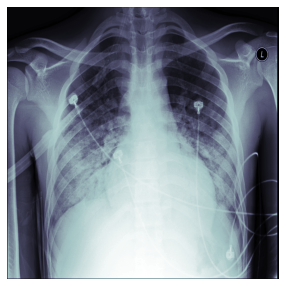

In [7]:
xray_sample.show()

In [8]:
dicom_dataframe = pd.DataFrame.from_dicoms(items)
dicom_dataframe[:5]

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,...,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.12022.1517875236.955173,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/home/jules/.fastai/data/siim_small/train/No Pneumothorax/000231.dcm,0,-1,123.288004,61.244245,0.264918
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11492.1517875233.203793,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/home/jules/.fastai/data/siim_small/train/No Pneumothorax/000176.dcm,0,-1,131.863223,65.060768,0.265991
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.31773.1517875156.775880,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/home/jules/.fastai/data/siim_small/train/No Pneumothorax/000160.dcm,0,-1,111.296286,70.710708,0.208520
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11274.1517875232.83625,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/home/jules/.fastai/data/siim_small/train/No Pneumothorax/000239.dcm,0,-1,107.421717,60.032055,0.313062
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.5579.1517875188.878457,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/home/jules/.fastai/data/siim_small/train/No Pneumothorax/000075.dcm,0,-11,143.044002,62.883188,0.178876


In [12]:
df = pd.read_csv(pneumothorax_source/f"labels.csv")
df.head()

,file,label
0,train/No Pneumothorax/000000.dcm,No Pneumothorax
1,train/Pneumothorax/000001.dcm,Pneumothorax
2,train/No Pneumothorax/000002.dcm,No Pneumothorax
3,train/Pneumothorax/000003.dcm,Pneumothorax
4,train/Pneumothorax/000004.dcm,Pneumothorax


In [13]:
pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
                   get_x=lambda x:pneumothorax_source/f"{x[0]}",
                   get_y=lambda x:x[1],
                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

In [14]:
dls = pneumothorax.dataloaders(df.values, num_workers=0)

/home/jules/miniconda3/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


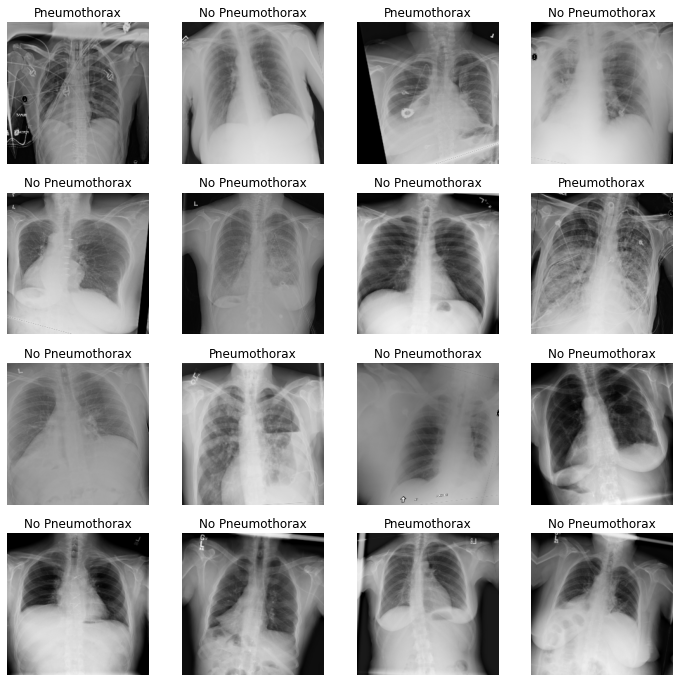

In [15]:
dls = pneumothorax.dataloaders(df.values)
dls.show_batch(max_n=16)

In [16]:
learn = cnn_learner(dls, resnet34,pretrained= False, metrics=accuracy)

SuggestedLRs(valley=0.001737800776027143)

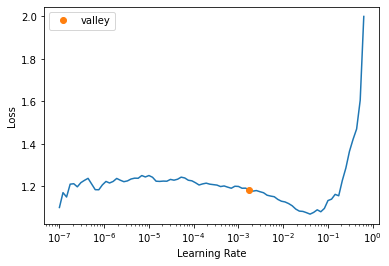

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(15, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.112979,89.101425,0.360000,00:02
1,1.232903,448521.625000,0.640000,00:02
2,1.206695,7021191.000000,0.360000,00:02
3,1.222016,501215.562500,0.640000,00:02
4,1.191284,7929.935059,0.640000,00:02
5,1.125564,2404.299316,0.640000,00:02
6,1.070715,993.885620,0.360000,00:02
7,1.047608,41.462769,0.660000,00:02
8,1.027190,90.971504,0.640000,00:02
9,0.999084,24.393957,0.640000,00:02


In [19]:
learn.predict(pneumothorax_source/f"train/Pneumothorax/000004.dcm")

('No Pneumothorax', TensorBase(0), TensorBase([0.7910, 0.2090]))

In [24]:
tta = learn.tta(use_max=True)

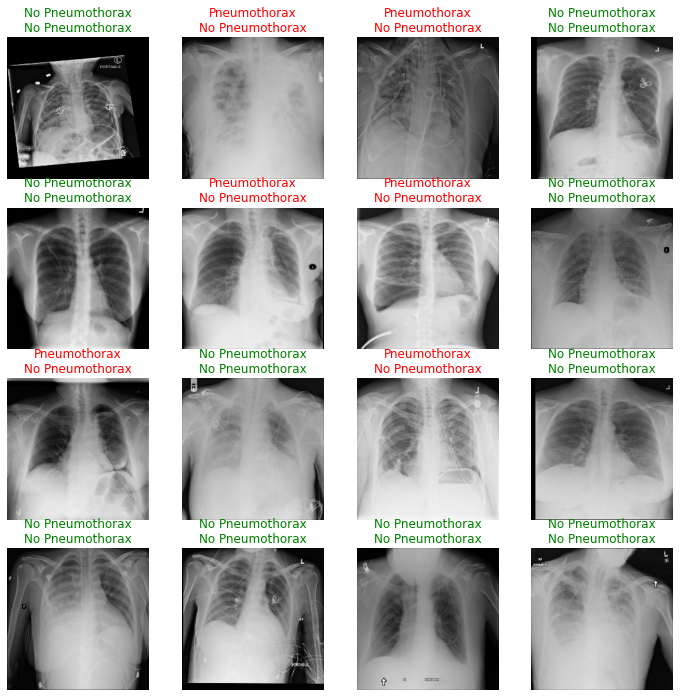

In [37]:
learn.show_results(max_n=16)

In [19]:
earn = cnn_learner(dls, resnet34, pretrained=False, metrics=accuracy)

SuggestedLRs(valley=0.0005754399462603033)

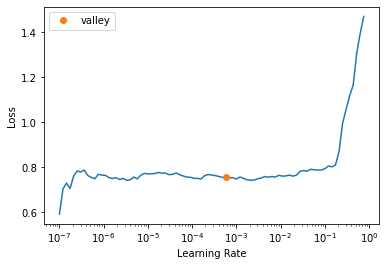

In [20]:
learn.lr_find()

In [32]:
learn.fit_one_cycle(15, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.728179,0.921511,0.620000,00:02
1,0.734647,0.941612,0.600000,00:02
2,0.681330,0.913338,0.600000,00:02
3,0.664357,0.936031,0.620000,00:02
4,0.678893,1.205509,0.620000,00:02
5,0.679307,1.118736,0.440000,00:02
6,0.675333,0.899281,0.640000,00:02
7,0.686712,1.064789,0.660000,00:02
8,0.679839,0.841115,0.640000,00:02
9,0.672841,0.775082,0.560000,00:02


KeyboardInterrupt: 

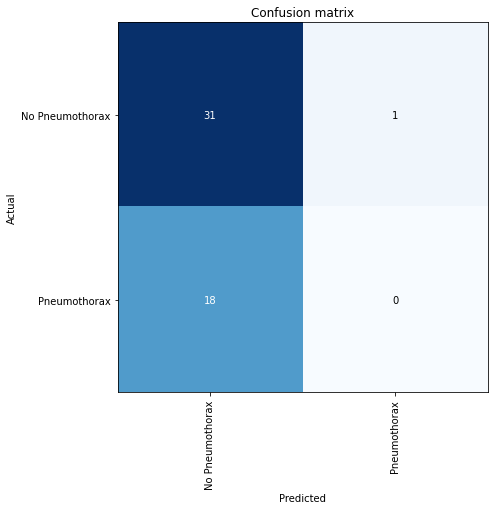

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

Evaluation of the model:

In [24]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

31 1 18 0


In [33]:
sensitivity = tp/(tp + fn)
sensitivity

0.0

In [26]:
specificity = tn/(fp + tn)
specificity

0.96875

In [34]:
ppv = tp/(tp+fp)
ppv

0.0

In [28]:
npv = tn/(tn+fn)
npv

0.6326530612244898

In [29]:
val = dls.valid_ds.cat

In [30]:
prevalence = 15/50
prevalence

0.3

In [31]:
accuracy = (sensitivity * prevalence) + (specificity * (1 - prevalence))
accuracy

0.678125